<a href="https://colab.research.google.com/github/JuanDiego24/Entregable_AnalisisDatos/blob/Normalizacion_codificacion/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# 1. Importar librerías
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


# Configuración de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# ============================
# 2. Cargar dataset
# ============================
df = pd.read_csv("student_habits_performance.csv")

# Vista general
print("Dimensiones:", df.shape)
print("\nTipos de variables:")
print(df.dtypes)

df.head()


Dimensiones: (1000, 16)

Tipos de variables:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:

# ============================
# 3. Revisión de valores faltantes
# ============================
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

faltantes = pd.DataFrame({
    "Valores faltantes": missing,
    "Porcentaje": missing_percent
}).sort_values(by="Porcentaje", ascending=False)

faltantes


,Valores faltantes,Porcentaje
parental_education_level,91,9.1
student_id,0,0.0
gender,0,0.0
age,0,0.0
social_media_hours,0,0.0
netflix_hours,0,0.0
part_time_job,0,0.0
study_hours_per_day,0,0.0
attendance_percentage,0,0.0
sleep_hours,0,0.0


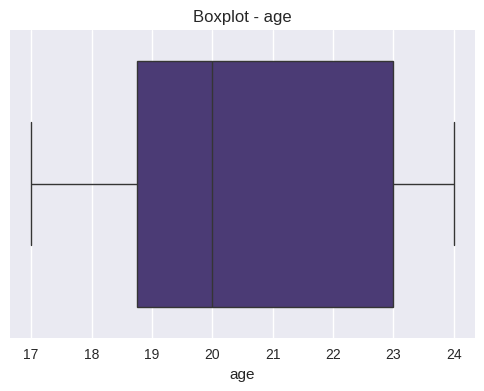

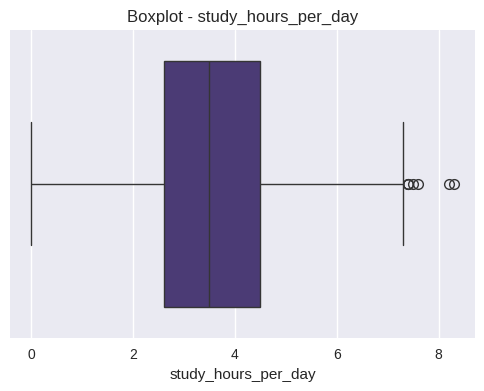

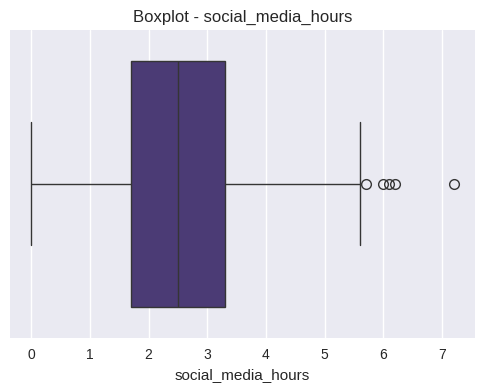

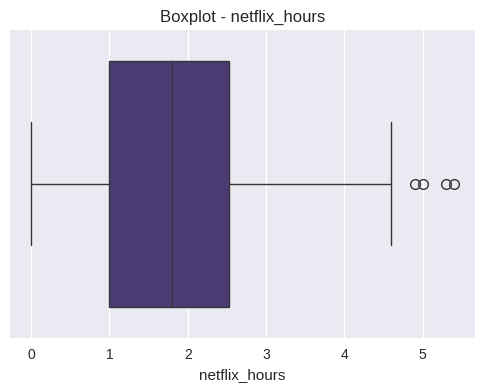

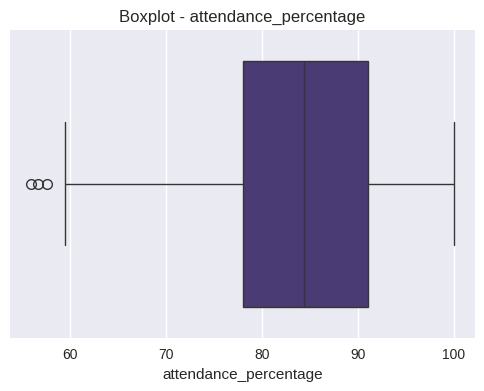

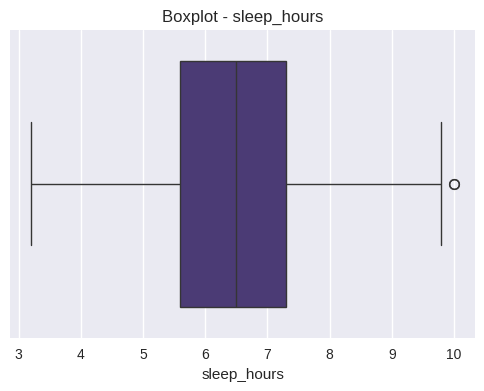

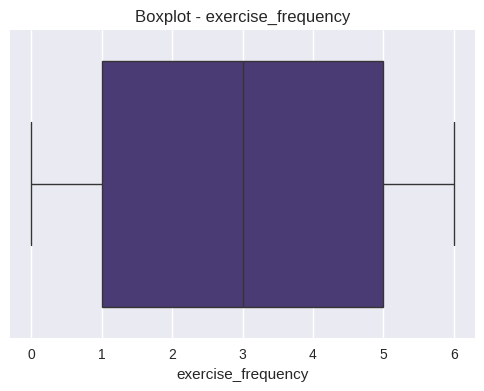

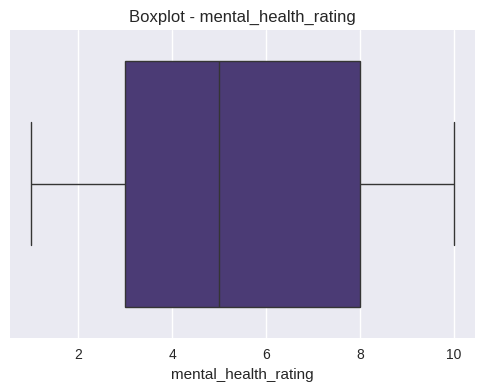

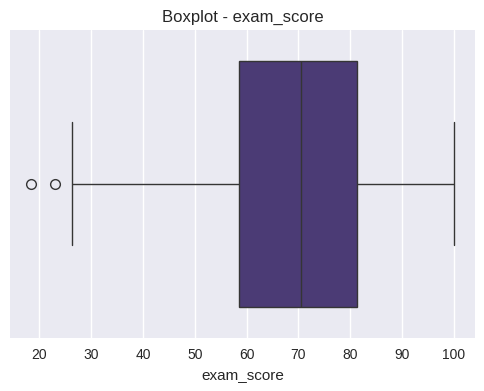

Número de outliers detectados por variable (Z-score > 3):
 [0 2 3 2 0 0 0 0 1]


In [ ]:

# ============================
# 4. Detección de valores atípicos (outliers)
# ============================

# Usando Boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

# Usando Z-Score para detectar outliers
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).sum(axis=0)  # cuantos outliers por variable
print("Número de outliers detectados por variable (Z-score > 3):\n", outliers)


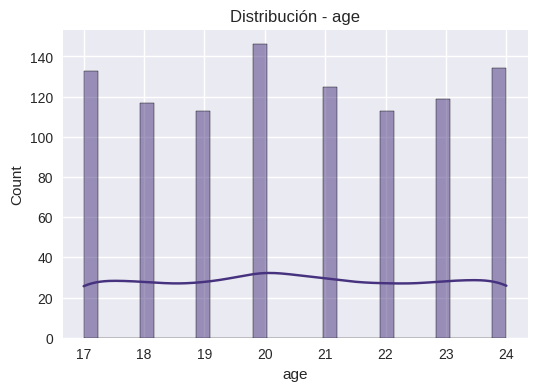

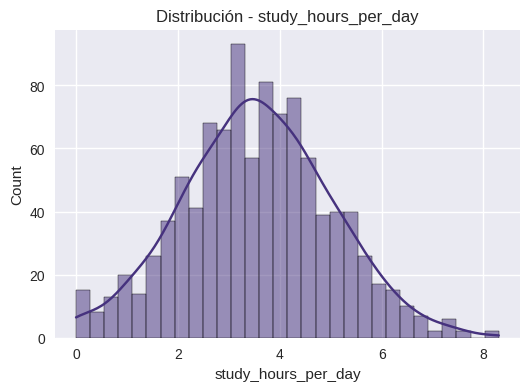

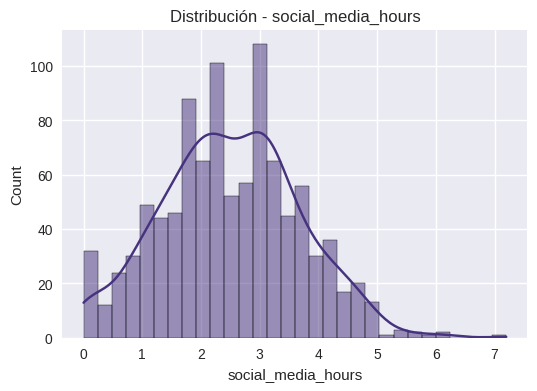

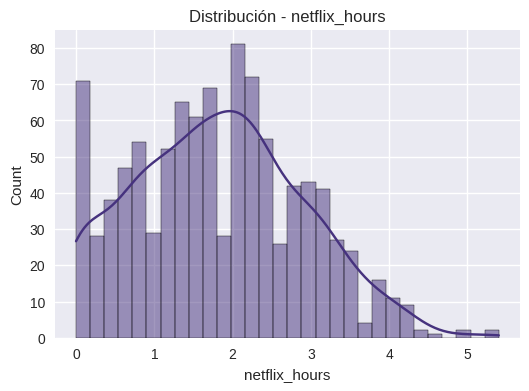

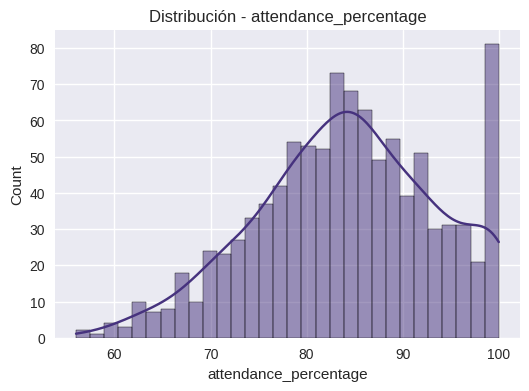

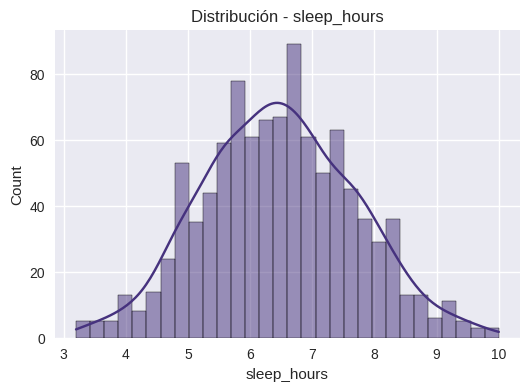

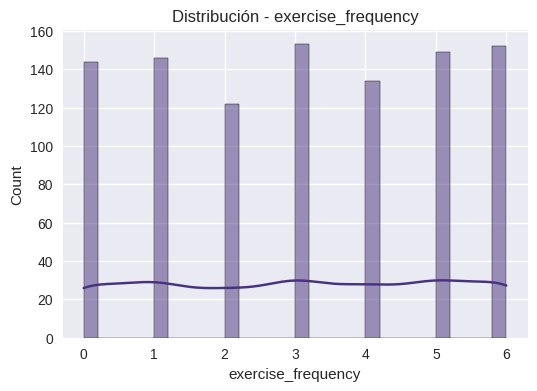

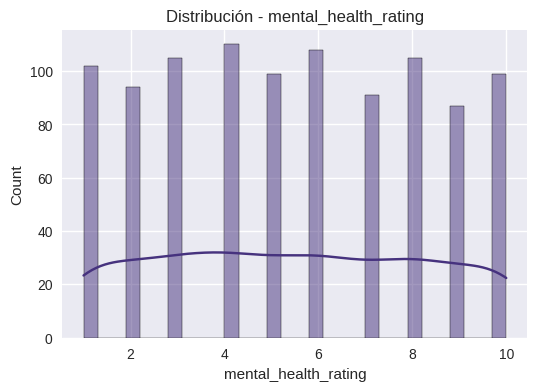

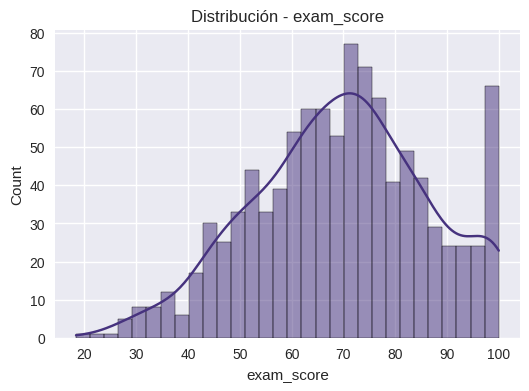

In [ ]:

# ============================
# 5. Análisis de distribuciones
# ============================

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución - {col}")
    plt.show()


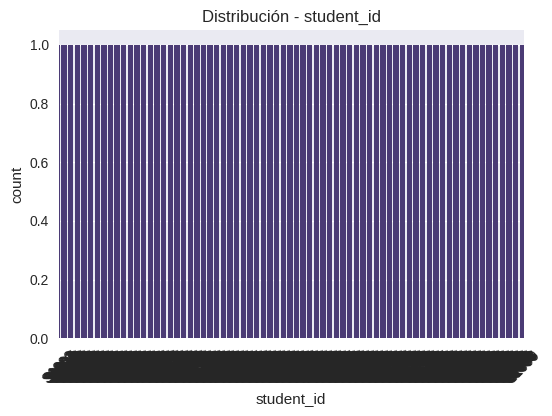

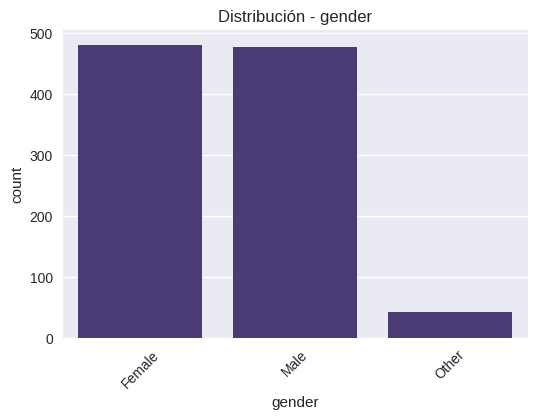

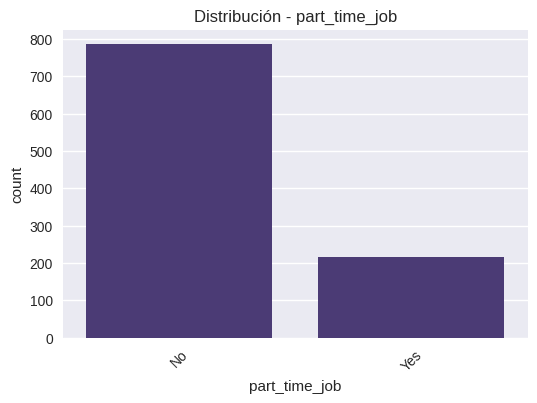

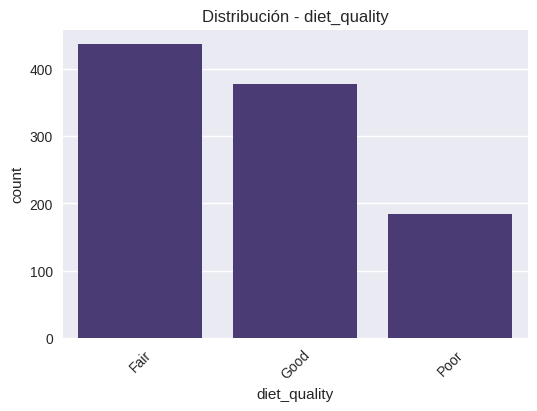

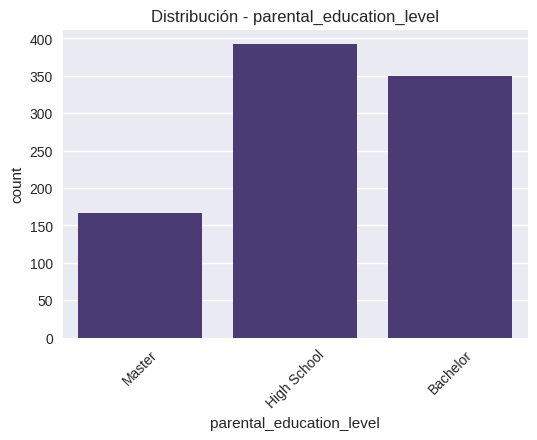

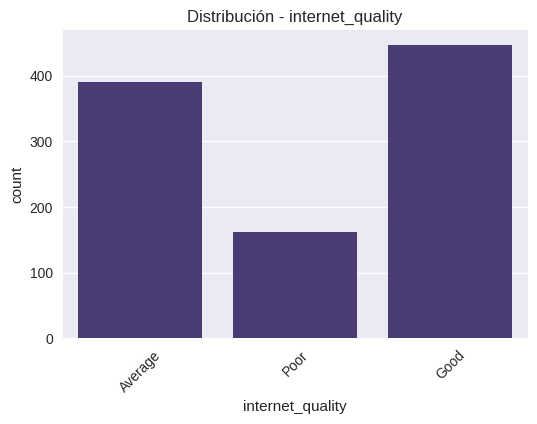

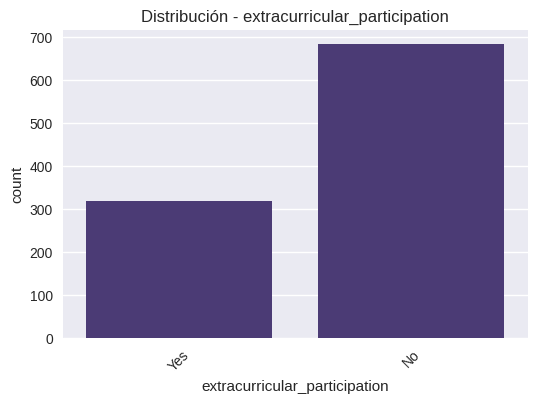

In [ ]:

# ============================
# 6. Análisis univariado
# ============================

# Estadísticos descriptivos
desc = df[numeric_cols].describe().T
desc["skewness"] = df[numeric_cols].skew()  # sesgo
desc["kurtosis"] = df[numeric_cols].kurt()  # curtosis
desc

# Variables categóricas
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución - {col}")
    plt.xticks(rotation=45)
    plt.show()


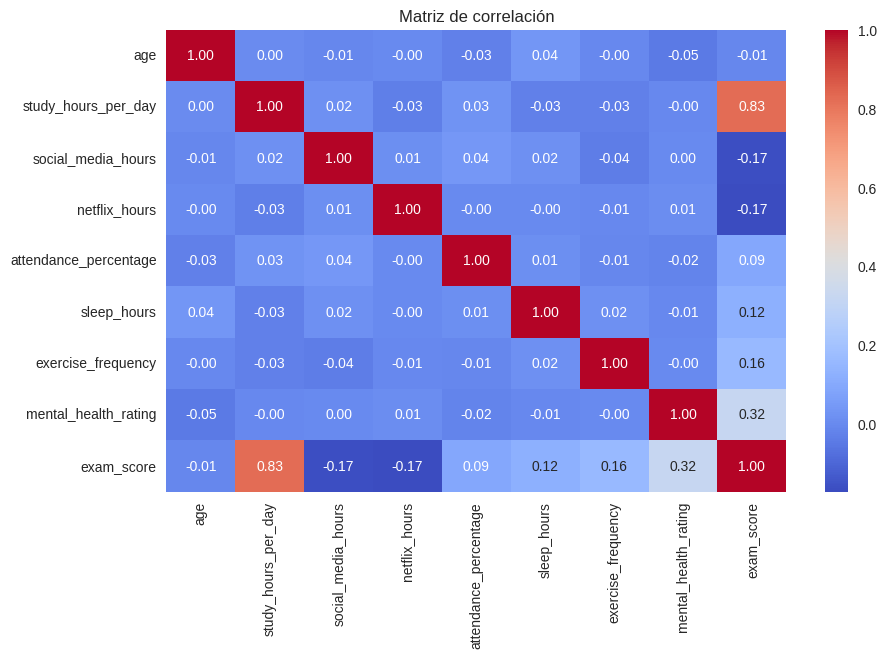

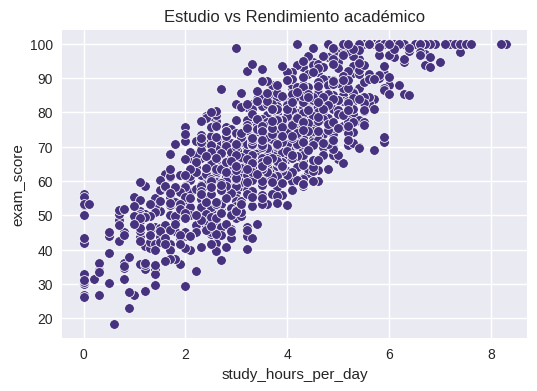

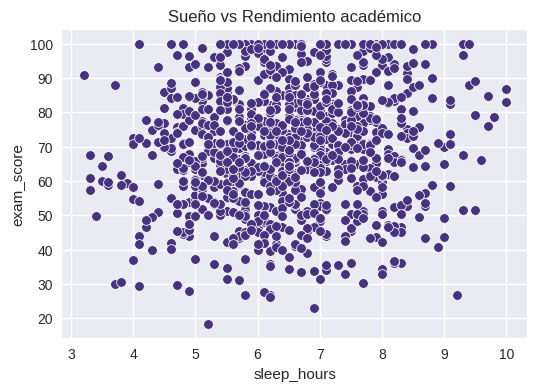

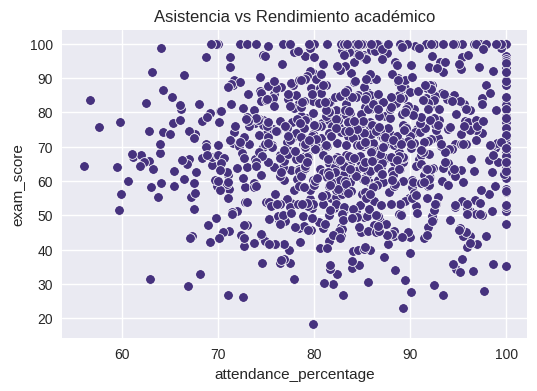

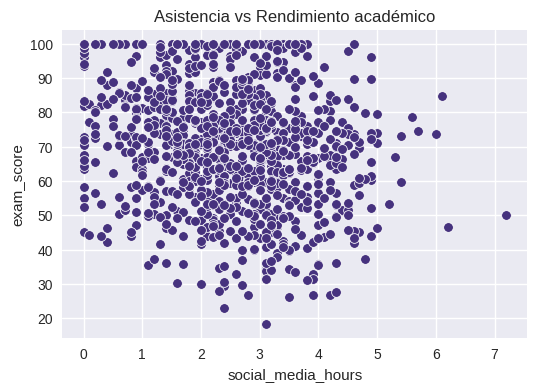

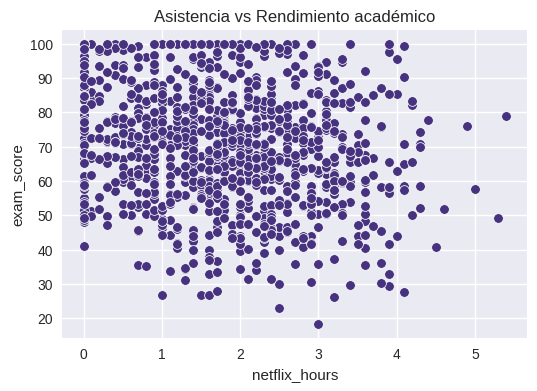

aprobado,No,Sí
gender,,
Female,28.274428,71.725572
Male,27.882600,72.117400
Other,26.190476,73.809524


In [ ]:

# ============================
# 7. Análisis multivariado
# ============================

# Correlación entre numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Relaciones con exam_score
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="study_hours_per_day", y="exam_score")
plt.title("Estudio vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="sleep_hours", y="exam_score")
plt.title("Sueño vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="attendance_percentage", y="exam_score")
plt.title("Asistencia vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="social_media_hours", y="exam_score")
plt.title("Asistencia vs Rendimiento académico")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="netflix_hours", y="exam_score")
plt.title("Asistencia vs Rendimiento académico")
plt.show()


# Tablas cruzadas: género vs aprobado/suspenso
df["aprobado"] = df["exam_score"].apply(lambda x: "Sí" if x >= 60 else "No")
pd.crosstab(df["gender"], df["aprobado"], normalize="index") * 100


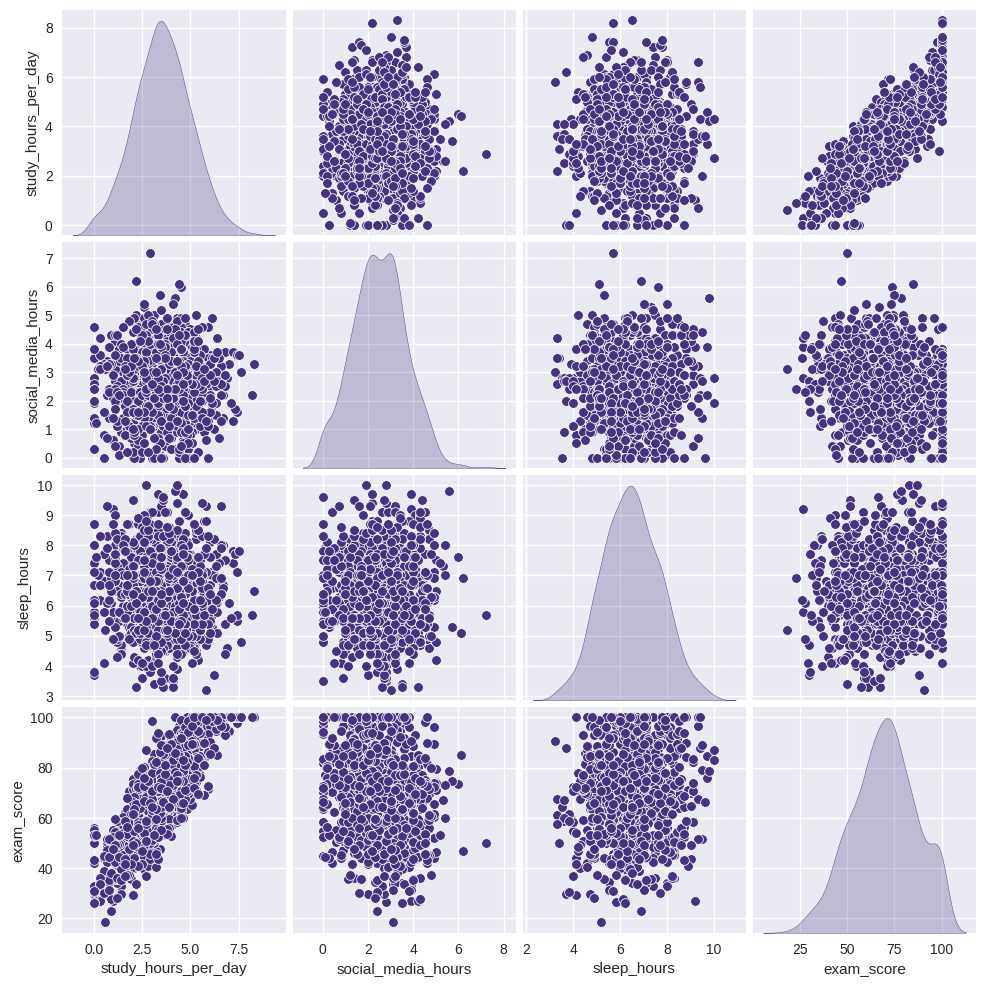

In [ ]:

# ============================
# 8. Pairplot (relaciones múltiples)
# ============================
sns.pairplot(df[["study_hours_per_day","social_media_hours","sleep_hours","exam_score"]], diag_kind="kde")
plt.show()


 9. Hipotesis Iniciales


Los Estudiantes con trabajo a tiempo parcial tienen, en promeio, puntajes de examen mas bajos.

Mas horas de estudio por dia se asocias positivamente con exam_score

Mas horas en redes Sociales o Netflix se asocian negativamente con exam_score

Mayor asistencia y mayor nivel educativo de los padres se asocian con mejores exam_score

La perticipacion extracurriculas puede relacionarse con el desempeño

In [ ]:

# ============================
# 10. Insights iniciales
# ============================
# Ejemplo de hallazgos automáticos (puedes complementarlos con interpretación visual)

print("Promedio de nota según si trabaja o no:")
print(df.groupby("part_time_job")["exam_score"].mean())

print("\nPromedio de nota según calidad de dieta:")
print(df.groupby("diet_quality")["exam_score"].mean())

print("\nPromedio de nota según calidad de internet:")
print(df.groupby("internet_quality")["exam_score"].mean())

print("\nPromedio de nota según nivel educativo de los padres:")
print(df.groupby("parental_education_level")["exam_score"].mean())

print("\nPromedio de nota según participación extracurricular:")
print(df.groupby("extracurricular_participation")["exam_score"].mean())

Promedio de nota según si trabaja o no:
part_time_job
No     69.836561
Yes    68.743256
Name: exam_score, dtype: float64

Promedio de nota según calidad de dieta:
diet_quality
Fair    70.428833
Good    69.366402
Poor    68.127568
Name: exam_score, dtype: float64

Promedio de nota según calidad de internet:
internet_quality
Average    70.643990
Good       68.647651
Poor       69.717284
Name: exam_score, dtype: float64

Promedio de nota según nivel educativo de los padres:
parental_education_level
Bachelor       70.272571
High School    69.547194
Master         68.086826
Name: exam_score, dtype: float64

Promedio de nota según participación extracurricular:
extracurricular_participation
No     69.591349
Yes    69.623270
Name: exam_score, dtype: float64


In [ ]:
# ========= CODIFICACIÓN DE VARIABLES CATEGÓRICAS =========

X = df.copy()

# Remueve identificadores y/o objetivo del modelado si no deben codificarse
for col_drop in ["student_id"]:
    if col_drop in X.columns:
        X = X.drop(columns=[col_drop])

# Normaliza strings en columnas object para evitar problemas de mayúsculas/espacios
obj_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
for c in obj_cols:
    X[c] = X[c].astype(str).str.strip().str.lower()



# Definir columnas por tipo de codificación

# Nominales (one-hot)
nominal_candidates = ["gender", "part_time_job", "extracurricular_participation"]
nominal_cols = [c for c in nominal_candidates if c in X.columns]


# Ordinales
ordinal_maps_dict = {}
if "diet_quality" in X.columns:
    # Orden lógico: poor < fair < good
    ordinal_maps_dict["diet_quality"] = ["poor", "fair", "good"]

if "internet_quality" in X.columns:
    # Orden lógico: poor < average < good
    ordinal_maps_dict["internet_quality"] = ["poor", "average", "good"]

if "parental_education_level" in X.columns:
    # Ajusta si tu dataset tiene otros niveles/orden
    # Orden propuesto: high school < bachelor < master
    ordinal_maps_dict["parental_education_level"] = ["high school", "bachelor", "master"]

ordinal_cols = list(ordinal_maps_dict.keys())

# Cualquier otra categórica no incluida arriba -> nominal
other_cat = [c for c in obj_cols if c not in nominal_cols + ordinal_cols]
nominal_cols += other_cat


#Construir transformadores

# OrdinalEncoder con manejo de desconocidos -> NaN (luego puedes imputar si deseas)
ord_encoder = None
if ordinal_cols:
    ord_encoder = OrdinalEncoder(
        categories=[ordinal_maps_dict[c] for c in ordinal_cols],
        handle_unknown="use_encoded_value",
        unknown_value=np.nan
    )

# OneHotEncoder
try:
    onehot = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
except TypeError:
    onehot = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

transformers = []
if ordinal_cols:
    transformers.append(("ord", ord_encoder, ordinal_cols))
if nominal_cols:
    transformers.append(("oh", onehot, nominal_cols))

pre_enc = ColumnTransformer(
    transformers=transformers,
    remainder="passthrough",                # deja pasar numéricas sin tocar
    verbose_feature_names_out=False
)


#Ajuste y transformacion

X_enc = pre_enc.fit_transform(X)

# Obtener nombres de columnas resultantes
try:
    feature_names = pre_enc.get_feature_names_out()
except AttributeError:
    # Fallback si la versión de sklearn no soporta get_feature_names_out en ColumnTransformer
    feature_names = []
    # Nombres de ordinales
    if ordinal_cols:
        feature_names += ordinal_cols
    # Nombres de one-hot
    if nominal_cols:
        oh_names = pre_enc.named_transformers_["oh"].get_feature_names_out(nominal_cols)
        feature_names += list(oh_names)
    # El resto (remainder passthrough): columnas numéricas originales
    passthrough_cols = [c for c in X.columns if c not in (ordinal_cols + nominal_cols)]
    feature_names += passthrough_cols

X_encoded = pd.DataFrame(X_enc, columns=feature_names, index=X.index)

X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan)
X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))

print("Shape codificado:", X_encoded.shape)
X_encoded.head()


Shape codificado: (1000, 17)


,diet_quality,internet_quality,parental_education_level,gender_male,gender_other,part_time_job_yes,extracurricular_participation_yes,aprobado_sí,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,23.0,0.0,1.2,1.1,85.0,8.0,6.0,8.0,56.2
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,6.9,2.8,2.3,97.3,4.6,6.0,8.0,100.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,21.0,1.4,3.1,1.3,94.8,8.0,1.0,1.0,34.3
3,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,3.9,1.0,71.0,9.2,4.0,1.0,26.8
4,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,19.0,5.0,4.4,0.5,90.9,4.9,3.0,1.0,66.4


In [ ]:
# ESCALADO / NORMALIZACIÓN

# Seleccion de solo columnas numericas
num_cols_after = X_encoded.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_encoded[num_cols_after])

X_scaled = pd.DataFrame(X_scaled_arr, columns=num_cols_after, index=X_encoded.index)

print("Shape escalado:", X_scaled.shape)
X_scaled.head()

Shape escalado: (1000, 17)


,diet_quality,internet_quality,parental_education_level,gender_male,gender_other,part_time_job_yes,extracurricular_participation_yes,aprobado_sí,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,-0.266175,-0.392302,1.718082,-0.955011,-0.209383,-0.523341,1.464464,-1.603567,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,-0.793922
1,1.112970,-0.392302,-1.086950,-0.955011,-0.209383,-0.523341,-0.682844,0.623610,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,1.800846
2,-1.645320,-1.768800,-1.086950,1.047108,-0.209383,-0.523341,-0.682844,-1.603567,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,-2.091307
3,-1.645320,0.984196,1.718082,-0.955011,-0.209383,-0.523341,1.464464,-1.603567,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,-2.535616
4,-0.266175,0.984196,1.718082,-0.955011,-0.209383,-0.523341,-0.682844,0.623610,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,-0.189661


Componentes retenidos: 14
Varianza acumulada: 0.9332


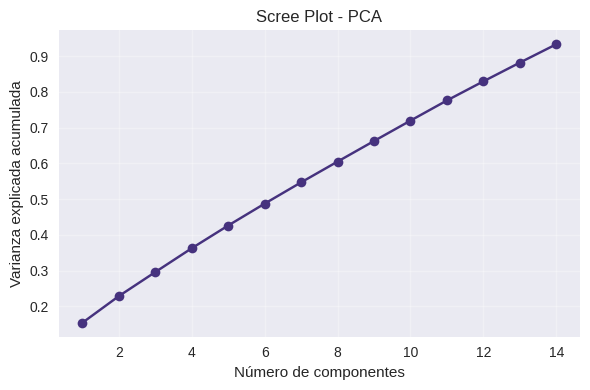

In [ ]:
# PCA

# PCA para conservar 90% de la varianza (ajusta si quieres 95%)
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
cum_var = np.cumsum(pca.explained_variance_ratio_)

print(f"Componentes retenidos: {X_pca.shape[1]}")
print(f"Varianza acumulada: {cum_var[-1]:.4f}")

# Scree Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker="o")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Scree Plot - PCA")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


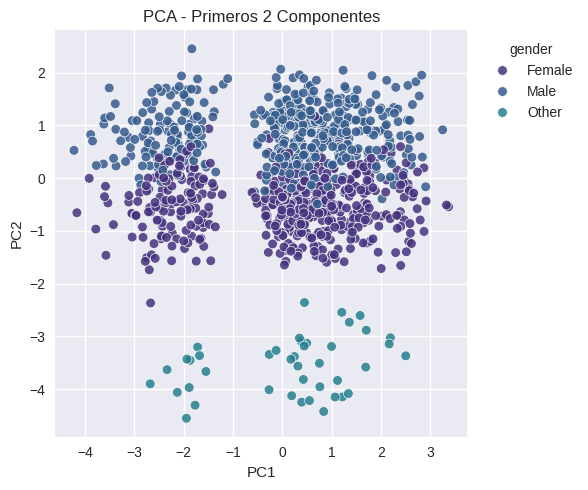

Top 10 variables más influyentes en PC1 y PC2:


,PC1,PC2
exam_score,0.599806,0.003962
aprobado_sí,0.542819,0.001879
study_hours_per_day,0.517537,0.085022
mental_health_rating,0.191415,0.076683
netflix_hours,0.118192,0.134557
social_media_hours,0.098650,0.139633
exercise_frequency,0.086456,0.245733
sleep_hours,0.067153,0.202751
attendance_percentage,0.055921,0.100445
part_time_job_yes,0.028477,0.064183


In [ ]:
# VISUALIZACIÓN

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1] if X_pca.shape[1] > 1 else np.zeros_like(pc1)

plot_df = pd.DataFrame({"PC1": pc1, "PC2": pc2}, index=df.index)

# Elegimos una variable para colorear (si existe en el df original)
hue_col = None
for candidate in ["aprobado", "gender", "diet_quality", "internet_quality", "extracurricular_participation"]:
    if candidate in df.columns:
        hue_col = candidate
        plot_df[hue_col] = df[candidate]
        break

plt.figure(figsize=(6,5))
sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue=hue_col if hue_col else None, alpha=0.85)
plt.title("PCA - Primeros 2 Componentes")
plt.legend(title=hue_col if hue_col else None, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === Cargas de variables (contribución a los primeros componentes) ===
loadings = pd.DataFrame(
    pca.components_.T,
    index=X_scaled.columns,
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]
)

print("Top 10 variables más influyentes en PC1 y PC2:")
display(loadings.iloc[:, :2].abs().sort_values(by="PC1", ascending=False).head(10))
